### Processing steps 
- The processing takes a long time, especially on large data set 
- Our Data set is composed of **900K** JobTeaser offers obtained from the Redshift Data base
- These offers are french job offers from 2017 until today
- We chose to use recent offers to get the most relevant jobs and skills currently existing in the market
- The processing was done on many notebooks, many variation were used with changes made on the regular expression and other parameters such as length of words, stemming process and entity recognition to delete locations from job titles
- We decided to use the processing step with regular expression to delete special carachters then pass it to the french stemmer to normlize the data and finally do the matching with ESCO job titles processed the same way

In [9]:
import skillsdb_functions as sf ## This file contain all function used in this notebook

In [13]:
Ex_job = 'Assistant Analyste Marketing H/F'
print("Job before processing :",Ex_job)
print("Job after processing :",sf.preprocessing_text(Ex_job))
print("------")
Ex_desc = "<p><strong>BNP Paribas</strong> est une banque leader de la zone euro et un acteur bancaire de premier plan dans le monde, avec une forte présence internationale. Nous rejoindre, c’est partager notre volonté d’aller de l’avant.</p><p><strong>BNP Paribas Corporate &amp; Institutional Banking (CIB)</strong> intervient dans les activités de conseil et de marchés de capitaux ainsi que les métiers de financement pour une clientèle de grandes entreprises et d'institutionnels. Présent dans 45 pays, CIB regroupe plus de 15 000 collaborateurs et 15 000 clients à travers le monde.</p><p><strong>Au sein du pôle CIB, BNP Paribas Securities Services</strong> est le premier fournisseur de services titres en Europe et le cinquième acteur mondial en termes de valeurs d’actifs en conservation. Nous rejoindre, c’est travailler dans un environnement cosmopolite et dynamique.</p><p><strong>BNP Paribas Securities Services</strong> recherche à Pantin un(e) alternant(e) :</p><p><strong>\xa0Assistant Analyste Marketing H/F</strong></p><p><strong>\xa0</strong></p><p><strong>\xa0</strong></p><p><strong>Contexte et enjeux :</strong></p><p>Vous intégrerez l’équipe Marketing central de BNP Paribas Securities Services (BP2S) en tant qu’alternant afin d’aider à la mise en place de nouvelles initiatives.</p><p>Ce poste a pour objectif principal d’aider au développement d’un segment client dans une équipe internationale.</p><p><strong>\xa0</strong></p><p><strong>Vos missions :</strong></p><p><strong>\xa0</strong></p><p>En tant qu’Assistant(e) Analyste Marketing, vous aurez deux rôles principaux :</p><p>1 - Rôle en support du responsable marketing sur les alternatives :</p><ul>\n<li>Mettre en place des outils marketing (brochures, présentation, plaquettes) sur les produits et services et réalisation de projets d'études et rapports à vocation promotionnelle</li>\n<li>Promouvoir des outils marketing sur le site internet et sur les réseaux sociaux ainsi qu’en interne</li>\n<li>Réaliser les campagnes marketing, aider à la définition et à l'exécution du programme de formation des équipes marketing locales, recueillir et formaliser les retours et les besoins</li>\n<li>Réaliser les campagnes de marketing direct et de ciblage, définir et mettre en place au sein de l’outil CRM (Customer Relationship Management) de critères d'extractions de populations sur les différents sous segments, en liaison avec les différents types de publication<br>2 - Rôle transverse à l'équipe:</li>\n<li>Participer à la digitalisation des supports marketing (promotion sur les réseaux sociaux, mass-mailings, webinars etc)</li>\n<li>Promouvoir l’offre en interne grâce à l’organisation d’une conférence téléphonique mensuelle à l'intention des forces de ventes et experts produits (gérer la préparation, réaliser le suivi et les comptes rendus)</li>\n<li>Réaliser une newsletter interne afin de communiquer aux forces de ventes et aux experts produits les nouveaux produits marketing disponibles, et les tenir informé des nouveaux sujets</li>\n<li>Réaliser une base documentaire marketing à l'attention des équipes de vente, aider à la mise en ligne des contenus marketing sur l'intranet commercial, effectuer les mises à jour éventuelles</li>\n<li>Supporter l’équipe marketing dans la préparation de la newsletter client trimestrielle</li>\n</ul><p><strong>Apports du poste :</strong></p><p>Vous aurez l’opportunité de:</p><ul>\n<li>Comprendre le fonctionnement d'une équipe marketing internationale</li>\n<li>Vous familiariser avec notre métier et celui de nos clients</li>\n<li>Vous familiariser avec les principaux acteurs du secteur et de comprendre leur vision stratégique</li>\n<li>Acquérir une expérience opérationnelle des outils de Customer Relationship Management et concepts de marketing direct</li>\n<li>Développer votre sens de la communication</li>\n</ul><p><strong>\xa0</strong></p><p><strong>Formation :</strong></p><p><strong>\xa0</strong></p><p>BAC+4 minimum en Ecole de Commerce et/ou équivalent universitaire avec une spécialisation en Marketing</p><p><strong>\xa0</strong></p><p><strong>Compétences techniques :</strong></p><p>ð Niveau d’anglais avancé</p><p>ð Maîtrise du Pack Office (en particulier d’Excel et de Powerpoint)</p><p><strong>Compétences comportementales :\xa0</strong></p><p>ð Capacité à collaborer</p><p>ð Capacité d’analyse</p><p>ð Capacité à communiquer</p><p>ð Autonomie et prise d’initiative</p><p>ð Créativité et sens de l’innovation</p><p><strong>Disponibilité :</strong></p><p>Contrat d’alternance (contrat d’apprentissage ou de professionnalisation) à démarrer en septembre 2017 pour une durée de 12 ou 24 mois</p><p><strong>Vous souhaitez candidater ?</strong></p><p><strong>\xa0</strong></p><p>Merci d’envoyer vos CV et lettre de motivation à l’adresse mail suivante :</p><p><strong>Paris_bp2s_rh_alternance@bnpparibas.com</strong></p>"
print("Description before processing :",Ex_desc[:121])
print("Description after processing :",sf.preprocessing_text(Ex_desc)[:121])


Job before processing : Assistant Analyste Marketing H/F
Job after processing : assist analyst marketing
------
Description before processing : <p><strong>BNP Paribas</strong> est une banque leader de la zone euro et un acteur bancaire de premier plan dans le monde
Description after processing : bnp parib banqu lead zon euro acteur bancair premi plan mond fort presenc international rejoindr partag volont aller avan


In [16]:
### load csv
import ast
#### Data set of ESCO occupations fr and en
DF_join_Occ_fr_en = sf.pd.read_csv("data/DF_join_Occ_fr_en.csv")
DF_join_Occ_fr_en = DF_join_Occ_fr_en.drop("Unnamed: 0",axis = 1)
DF_join_Occ_fr_en = DF_join_Occ_fr_en.drop("Unnamed: 0.1",axis = 1)
### to get our list format
DF_join_Occ_fr_en['altLabels'] = sf.ast_string_to_list(DF_join_Occ_fr_en['altLabels'])
DF_join_Occ_fr_en['altLabels_proc'] = sf.ast_string_to_list(DF_join_Occ_fr_en['altLabels_proc'])
#### Data set of 900K JT offers in french and with theirs titles processed "Title_ProcF"
JT_Offers_fr_grouped = sf.pd.read_csv("data/JT_Offers_fr_grouped_desc_proc.csv")
JT_Offers_fr_grouped = JT_Offers_fr_grouped.drop("Unnamed: 0",axis = 1)


In [17]:
DF_join_Occ_fr_en[['altLabels','altLabels_proc']].head()

,altLabels,altLabels_proc
0,"[technical director, directeur technique/direc...","[technical director, directeur techniqu direct..."
1,"[metal drawing machine operator, opérateur de ...","[metal drawing machin operator, oper trefiler ..."
2,"[precision device inspector, contrôleur qualit...","[precis devic inspector, controleur qualit ins..."
3,"[air traffic safety technician, technicien de ...","[air traffic safety technician, technicien sec..."
4,"[hospitality revenue manager, responsable yiel...","[hospitality revenu manag, respons yield manag..."


In [27]:
JT_Offers_fr_grouped[['title','Title_ProcF']].head()

,title,Title_ProcF
0,\t\tAssistant Analyste Marketing H/F,assist analyst marketing
1,\t\tIngénieur électricité & informatique indus...,ingenieur electricit informat industriel bilba...
2,\t Analyste crédit - Banque de Grande Clientèle,analyst cred banqu grand clientel
3,\t Assistant des ouvertures - H/F,assist ouvertur
4,\t Business Developer & Community Manager,business develop community manag


### Matching:
- First we processed the Job offers titles and ESCO job titles with the same function, it starts by removing stop words (english and french), then stemming using the french stemmer from NLTK (Faster than lemmetizing and more adapted to key word matching).
- After this we applied a regular expression algorithm that was responsible for changing special characters to spaces and removing words composed of less than two characters.
- The matching process is simple we just search for ESCO job inside a job offers, it's looser than the exact match, but we needed to do it this way because the majority of job offers titles are long and contain elements such as place,type of contract or the experience with the name of the job it self.
- We reached 40% of offers matched with this method, it's due to the fact that recruiters sometimes put uncommon titles for their offers, a title that doesn't represent a concrete job, and the use of abbreviations makes it a hardly controllable process with a rule based approach.
#### Possibility of enhancement
- Match ESCO jobs with offers descriptions
- Use a learning apporch to classifiy offers to their respective job title (You can use the offers already matched, that will form a data set with 330K observations and 1050 ESCO job label)
- A problem that may arise is the important number of labels, this is a dilemma for supervised machine learning models, because models tend to perform well on some labels and bad for other.
- A naive baise model is known to handle a large number of labels could be a solution, also a **hierarchical classification** in this case can yield good result.
- The concept is simple you divide the error of one model over multiple models, since ESCO jobs are grouped in categories, you can use those to build a model that predicts the group than multiple models for reach group to predict the job, this was used in one of **CarreBuilder** research papers, and it proved its efficiency.
- Also, the problem of the distribution of labels on the training set, since some jobs are rare, they may not be frequent in our data set compared to other jobs.(**2015 IEEE First International Conference on Big Data Computing Service and Applications
Carotene: A Job Title Classification System for the Online Recruitment Domain**)
- You can find all articles on the drive of chapters:Data science team under the folder "Articles"
- A Tree based model is known to handle well this imbalance of distribution.
- Using a sampling method to rise the number of observations for the rare labels or decrease the number for the frequent labels.
- For the tree based algortihm, the **boosting** which makes it possible to adapt the error rate according to an error cost or according to the probability of its class by assigning different weights to the individuals of the learning set. After each iteration the weight on the misclassified individuals increases and that on the classified individuals decreases correctly. Since errors are often concentrated on rare classes, we can think that boosting improves learning on unbalanced data sets by increasing the weight of individuals belonging to the minority class.
- Various variants of the boosting have been proposed to adapt it specifically to the problem of imbalance (You can check **AdaCost** and **RareBoost**)
- There're also variants of **Random forest**, such as **Balanced Random Forest (BRF)** and **Weighted Random Forest (WBF)**, that could be helpful for the imbalance problem.

In [7]:
## altLabels list contains the preferred labels and alternatives appelations
altLabels = list(DF_join_Occ_fr_en.altLabels_proc)
JT_Offers_fr_grouped['ESCO'] = JT_Offers_fr_grouped.Title_ProcF.apply(lambda x:sf.matching(x,altLabels,DF_join_Occ_fr_en))
JT_Offers_fr_grouped['ESCO'] = JT_Offers_fr_grouped['ESCO'].apply(lambda x:list(set(x)))

### 333707 JT Job offers were matched

In [64]:
JT_Offers_fr_grouped['ESCO'].apply(lambda x:True if len(x)>0 else False).value_counts()

False    567440
True     333707
Name: ESCO, dtype: int64

In [71]:
flat_esco_list = [item for sublist in list(JT_Offers_fr_grouped['ESCO']) for item in sublist]
print("Number of ESCO job matched :",len(list(set(flat_esco_list))))

Number of ESCO job matched : 1050


### Some samples

In [83]:
matched_offers = JT_Offers_fr_grouped[['title','Title_ProcF','ESCO']][JT_Offers_fr_grouped['ESCO'].apply(lambda x:True if len(x)>0 else False)]

In [84]:
pd.options.display.max_colwidth = 10000
matched_offers.sample(10)

,title,Title_ProcF,ESCO
699384,Stage Assistant Chef de Produits - Programme H/F,assist chef produit programm,[chef de produit]
271033,Chargé(e) Communication / Marketing,charg commun marketing,[chargé des relations publiques/chargée des relations publiques]
496028,Ingénieur maintenance spécialisée (F/H),ingenieur mainten specialise,[ingénieur maintenance/ingénieure maintenance]
179057,Assistant.e Chef de Projets Communication et Événementiel - La Minute Papillon & Café Pinson,assist chef projet commun evenementiel minut papillon caf pinson,[chef de projet]
262446,Chargé de mission Digital Learning H/F,charg mission digital learning,[chargé de mission/chargée de mission]
843203,Stagiaire chargé(e) de communication digitale,charg commun digital,[chargé des relations publiques/chargée des relations publiques]
155977,Assistant(e) Chef de produits Compléments Alimentaires H/F (stage 6 mois),assist chef produit compl alimentair mois,[chef de produit]
142091,Assistant contrôleur de gestion,assist controleur gestion,[analyste de gestion]
153548,Assistant(e) Chef de Projet,assist chef projet,[chef de projet]
320467,Chef de service Construction,chef servic construct,[chef de service]


In [85]:
matched_offers.sample(10)

,title,Title_ProcF,ESCO
680791,Stage - Key Account Manager / Foodie,key account manag food,"[responsable des caisses, directeur ventes et relations clientèle/directrice ventes et relations clientèle, chargé de compte TIC/chargée de compte TIC]"
115967,Assistant Chef de publicité international,assist chef publicit international,"[directeur de la publicité/directrice de la publicité, chef de publicité]"
15632,7 offres de stage en contrôle de gestion – Secteurs Lyon et Nancy,offre control gestion secteur lyon nancy,[analyste de gestion]
498472,Ingénieur travaux Stagiaire,ingenieur traval,[ingénieur travaux/ingénieure travaux]
208188,Business Developer / SDR (H/F),business develop sdr,[responsable de la prospection]
319482,Chef de publicité,chef publicit,"[directeur de la publicité/directrice de la publicité, chef de publicité]"
165204,Assistant(e) Office Manager H/F,assist offic manag,[chef de service]
833611,Stagiaire International business developer H/F (Lille),international business develop lill,[responsable de la prospection]
401021,Directeur Commercial (H/F),directeur commercial,[directeur commercial/directrice commerciale]
805757,Stage- Growth Hacker (H/F)- MeetYourJob,growth hack meetyourjob,[spécialiste de l'optimisation des moteurs de recherche]


In [90]:
matched_offers.sample(10)

,title,Title_ProcF,ESCO
853450,Start up / stage bras droit directeur financier,start bras droit directeur financi,[directeur financier/directrice financière]
513571,Junior Product Specialist - Fonds Actions,junior product specialist fond action,[contrôleur de la qualité des produits/contrôleuse de la qualité des produits]
142135,Assistant contrôleur de gestion (H /F),assist controleur gestion,[analyste de gestion]
70047,Alternance chargé(e) de mission SIRH F/H,charg mission sirh,[chargé de mission/chargée de mission]
479008,Ingénieur Informatique en Outil de modélisation et de simulation,ingenieur informat outil modelis simul,[ingénieur intégration/ingénieure intégration]
71254,Alternance – Ingénieur d’Etudes et Développement pour un organisme de la Protection Sociale dans sa transformation numérique – H/F,ingenieur etud developp organ protect social transform numer,[ingénieur d’études/ingénieure d’études]
827971,Stagiaire Data Engineer Développeur SAS H/F,dat engine developpeur sas,[scientifique des données]
616362,STAGE ASSISTANT MARKETING H/F - EDITIONS BORDAS,assist marketing edit bord,[assistant marketing/assistante marketing]
632824,STAGE OPERATIONS MANAGER,oper manag,"[agent administratif back-office marché/agente administrative back-office marché, responsable commercial/responsable commerciale, directeur de mine/directrice de mine, responsable des activités informatiques, directeur des opérations/directrice des opérations, responsable en production métallurgique]"
736278,Stage Développement Logiciel C++/3D,developp logiciel,[développeur de logiciels/développeuse de logiciels]


In [30]:
JT_Offers_fr_grouped.to_csv("data/matched_esco_jt_offers.csv",index=False)

In [22]:
JT_Offers_fr_grouped.head()

,title,description,position_category_id,Freq,Title_Proc,Title_Proc2,Title_Proc3,title_loc_proc,Title_ProcF,description_proc
0,\t\tAssistant Analyste Marketing H/F,<p><strong>BNP Paribas</strong> est une banque...,242,1,assist analyst marketing,assist analyst marketing,assist analyst marketing,\t\tAssistant Analyste Marketing H/,assist analyst marketing,parib banqu lead zon euro acteur bancair premi...
1,\t\tIngénieur électricité & informatique indus...,<p>Entreprise :</p><p><strong>ORMAZABAL </stro...,272,1,ingenieur electricit informat industriel bilbao,ingenieur electricit informat industriel bilbao,ingenieur electricit informat industriel bilbao,\t\tIngénieur électricité & informatique indus...,ingenieur electricit informat industriel bilba...,entrepris ormazabal branch electr group indust...
2,\t Analyste crédit - Banque de Grande Clientèle,"<table><tbody>\n<tr>\n<td width=""200"">Descript...",249,1,analyst cred banqu grand clientel,analyst cred banqu grand clientel,analyst cred banqu grand clientel,\t Analyste crédit - Banque de Grande Clientèle,analyst cred banqu grand clientel,descript mission analys cred grand groupesetud...
3,\t Assistant des ouvertures - H/F,"CONTEXTE<p>Depuis 2004, le Groupe La Maison Bl...",253,1,assist ouvertur,assist ouvertur,assist ouvertur,\t Assistant des ouvertures - /,assist ouvertur,contextedepuis group maison bleu entrepris spe...
4,\t Business Developer & Community Manager,<p><strong><u>Entreprise</u></strong> : Hélène...,239,1,business develop community manag,business develop community manag,business develop community manag,\t Business Developer & Community Manager,business develop community manag,entrepris helen fleurac gastronomieentrepris g...


### Some plots to see the most frequent jobs

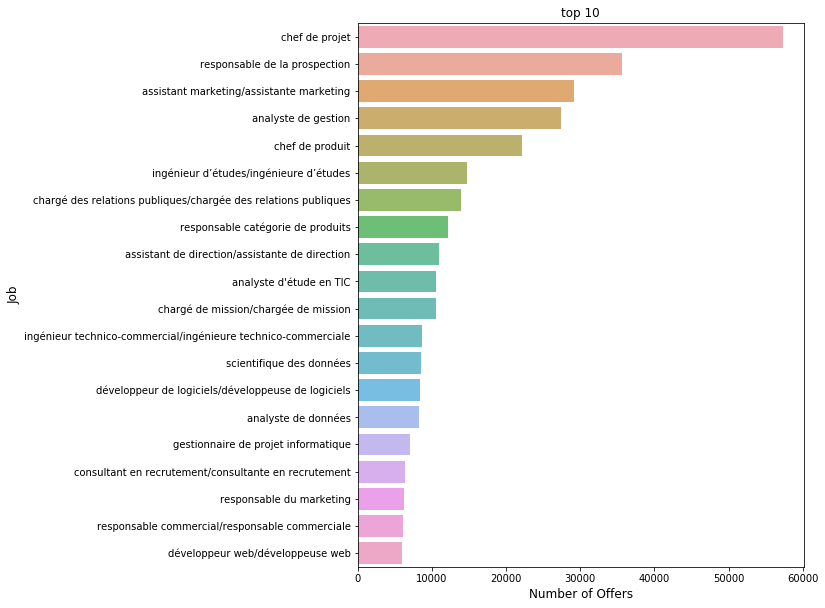

In [129]:
from collections import Counter
count  = dict(Counter(flat_esco_list).most_common(20))
plt.figure(figsize=(8,10))
sns.barplot(y = list(count.keys()), x = list(count.values()), alpha=0.8)
plt.title('top 10')
plt.xlabel('Number of Offers', fontsize=12)
plt.ylabel('Job', fontsize=12)
plt.show()